<a id="table"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;"> 📈 THOMPSON SAMPLING  📈</h1>

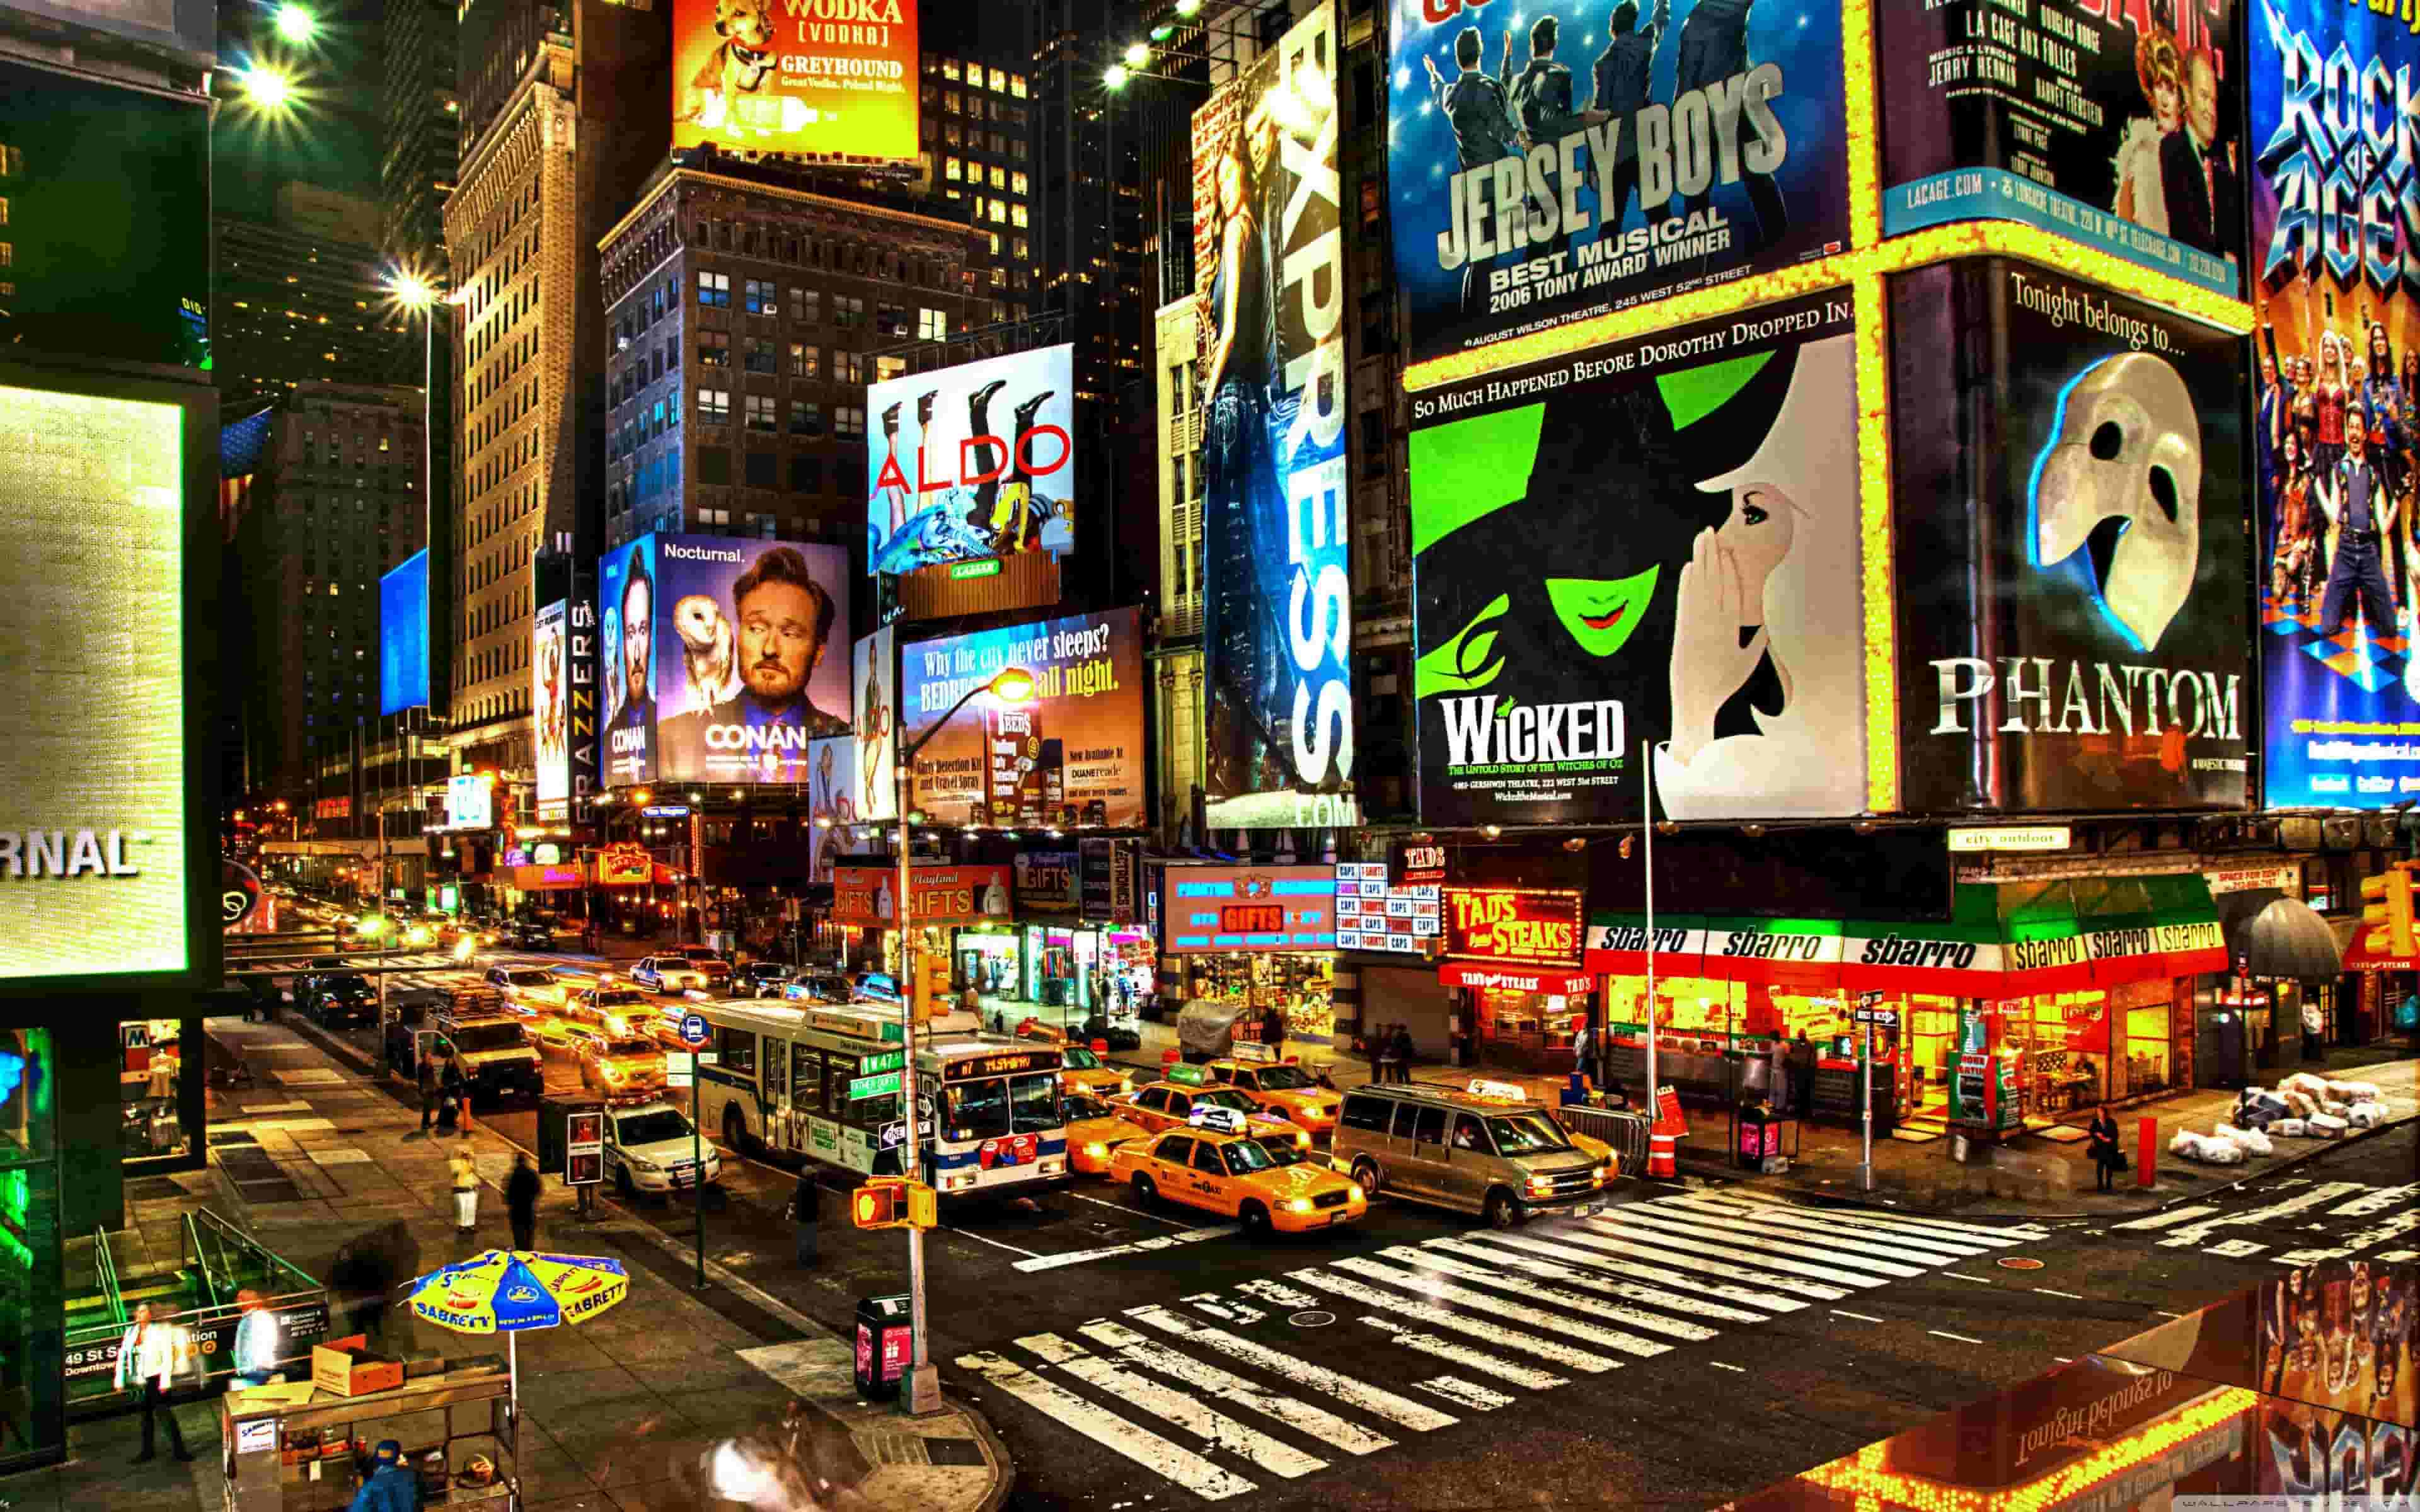

**Imagine yourself as an octopus in a casino. Like this:**

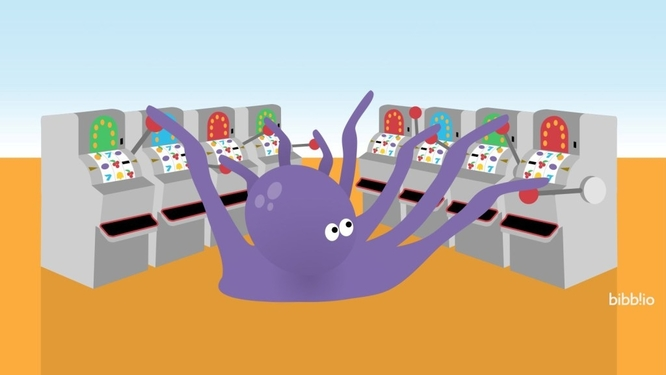

**There are many one armed bandits in front of you, as in the image below. And each machine has a different monetization rate, and you don't know it. Before starting the game, you were given an exploration time.**

**What would you do?**

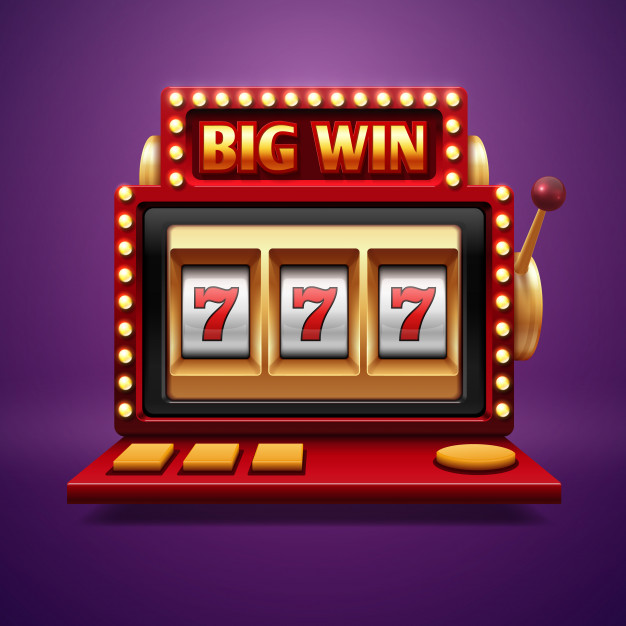

**In such situations, Thompson Sampling comes to our rescue!**

**But what is Thompson Sampling? Let's see together.**

<a id="0"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:275%;text-align:center;border-radius: 15px 50px;">THOMPSON SAMPLING DESCRIPTION</h1>

**What is Sampling?**

For instance, 1 million shoes are produced daily in a factory, but we only select 100 of them to examine them, the process we do here is called Sampling.

**What is Thompson Sampling?**

It was originally described by Thompson in 1933, and has been improved many times over the years. Thompson sampling,named after William R. Thompson, is a heuristic for choosing actions that addresses the exploration-exploitation dilemma in the multi-armed bandit problem. It consists of choosing the action that maximizes the expected reward with respect to a randomly drawn belief.


**When is it used?**

For example you will publish ads on the internet about an airline company, you want to update your ad according to which ad is clicked more.
In this case you can use Thompson Sampling.
For example, we produce shoes in a factory, we can use this method when we find out how much of it is defective. Let's try to understand the concept of sampling better, 

**Relationship Between Thompson Sampling & Bayesian Inference**

Thompson sampling is a Bayesian inference, so what is Bayesian inference?
> “Briefly, Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available. Bayesian updating is particularly important in the ‘dynamic’ analysis of a sequence of data.“

Our keyword here is 'dynamic'. While working on this data, Thompson Sampling algorithm will update some values after analyzing each data row. Since it will be an analysis with continuous updating, Thompson Sampling is dynamic, which is why the Bayesian approach is applied in Thompson Sampling.

**Why Beta Distribution for Thompson Sampling?**

> As more data is collected the <a href="https://en.wikipedia.org/wiki/Beta_distribution"> Beta distribution </a> moves from being a flat line to become an increasingly accurate model of the probability of the mean reward. By maintaining the values of 'α' and 'β' a Thompson sampling algorithm is able to describe the estimated mean reward and the level of confidence in this estimate.</p>

When we give the values ​​of α and β to the random.beta variate( ) function, for example, let's give these parameters to the function as α=2 and β=5. For our use in the Thompson Sampling algorithm, we will generate random points by random.betavariate( ) in the beta distribution where alpha is 2 beta 5 (i.e. the orange curve in the image below), and we will use these randomly generated points in the algorithm.


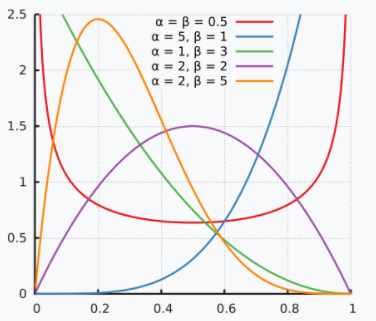


**Thompson Sampling Algorithm**

***Step 1***:

Calculate the following two numbers for each action.

* Ni⁰(n) : the number of times a '1' is received as a reward so far (α value)
 
* Ni¹(n) : the number of times a '0' is received as a reward so far (β value)
                                                                           
                                   
***Step 2:***<p>Generate a random number for each ad in the<a href="https://en.wikipedia.org/wiki/Beta_distribution"> beta distribution </a>given below. </p>

" θi(n) = β(Ni¹(n) +1 , Ni⁰(n) +1) "  

***Step 3:***

Choose the ad with the highest beta value.



**References:**

* https://en.wikipedia.org/wiki/Bayesian_inference
* https://en.wikipedia.org/wiki/Thompson_sampling
* https://towardsdatascience.com/thompson-sampling-using-conjugate-priors-e0a18348ea2d
* https://www.udemy.com/course/makine-ogrenmesi/

***Written by Soner Kar                                                                                                                               
04/07/2021***                                                                                            

<a id="1"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:275%;text-align:center;border-radius: 15px 50px;">CODING ON ADS DATA SET</h1>

In [ ]:
# imports 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
# data read

data_path = '../input/ads-ctr-optimisation/Ads_CTR_Optimisation.csv'

df = pd.read_csv(data_path)
df.head()

In [ ]:
df.shape

**There are 10.000 users and 10 ads type.**

In [ ]:
#Thompson Sampling

N = 10000 # 10.000 users
a = 10  # there are 10 ads type in total
# Ni⁰(n) -> the number of times '1' arrives so far
# Ni¹(n) -> the number of times '1' arrives so far
total_reward = 0 # sum of rewards
chosen_ads = []  # an empty list created for choosed ads
ones = [0] * a   # '1' as a reward from each ad
zeros = [0] * a  # '0' as a reward from each ad

for n in range(1,N): # Outer loop that allows us to navigate rows
    chosen_ad = 0 
    max_beta = 0
    for i in range(0,a): # Inner loop that allows us to navigate columns
        random_beta = random.betavariate (ones[i] +1 , zeros[i] +1) # Creating random beta by giving α(alpha) and β values
        if random_beta > max_beta:
            max_beta = random_beta # Max_beta is constantly updated, if a value greater than itself, it changes.
            chosen_ad = i  # We add which ad we clicked for each line to the selected ads
    chosen_ads.append(chosen_ad) # We add whichever ad we choose in each row to the selected ads list
    reward = df.values[n,chosen_ad] # If n. chosed ad data in row=1, reward=1. otherwise 0
    if reward == 1:
        ones[chosen_ad] = ones[chosen_ad]+1 # When the reward is 1, increase the reward of the corresponding ad by 1.
    else :
        zeros[chosen_ad] = zeros[chosen_ad] + 1 # When the reward is 1, increase the value of the corresponding ad in the ones list by 1.
    total_reward = total_reward + reward  # Add the reward resulting from the operation performed on each row of the dataset to the total reward.
    
print('\033[1m' + f'Total Reward: {total_reward}')  

In [ ]:
# True Clicks of Ads

true_clicks = []
for i in range(0,10):
    true_clicks.append(sum(df.iloc[:,i:i+1].values))
    
true_clicks = [int(item) for item in true_clicks]
    
true_clicks_array = np.array(true_clicks)
true_clicks_array = true_clicks_array.reshape(1,10)

true_clicks_df = pd.DataFrame(data=true_clicks_array, columns=df.columns, index=['Total True Clicks'])
true_clicks_df

In [ ]:
max_ad_click = true_clicks_df.values.max()
max_ad_click_name = true_clicks_df.idxmax(axis=1)[0]

sum_of_clicks=0
for i in range(1,10):
    sum_of_clicks = sum_of_clicks + true_clicks_df.values[0][i]
    
ratio = max_ad_click/sum_of_clicks

print(f'Sum of clicks                   : {sum_of_clicks}')
print(f'The name of the most clicked ad : {max_ad_click_name}')
print(f'The ratio of {max_ad_click_name} to all clicks : {ratio:.2f}\n')

**25% is quite high. This value is good for the Thompson Sampling algorithm to make choices.**

In [ ]:
# Let's show the number of clicks with a graph.

plt.figure(figsize = (12,8), facecolor='#9DF08E')
plt.bar(x=df.columns, height=true_clicks, color=sns.color_palette('bright'))
plt.title('True Clicks on Ads\n', fontsize=30, color='red')
plt.xlabel('\nAds', fontsize=20, color='black')
plt.ylabel('Clicks\n', fontsize=20, color='black')
plt.xticks(horizontalalignment='center', fontsize='15', color='black')
plt.yticks(fontsize='15', color='black')
plt.tight_layout()
plt.show()

**This graph is drawn from the data in this dataset. It can be seen that users clicked on the 'Ad 5' advertisement the most. So the Thompson Sampling Algorithm should also give priority to the Ad 5 ad. Let's see what happens.**

In [ ]:
# Chosens of Thompson Sampling

number_of_chosens = []
for i in range(0,10):
    number_of_chosens.append(chosen_ads.count(i))
    
number_of_chosens_arr = np.array(number_of_chosens)
number_of_chosens_arr = number_of_chosens_arr.reshape(1,10)

number_of_chosens_df = pd.DataFrame(data=number_of_chosens_arr, columns=df.columns, index=['Number of Chosens'])
number_of_chosens_df

In [ ]:
plt.figure(figsize = (12,8),facecolor='#9DF08E')
plt.bar(x=df.columns, height=number_of_chosens, color=sns.color_palette('bright'))
plt.title('Number of Choices\n', fontsize=30, color='red')
plt.xlabel('\nAds', fontsize=20, color='black')
plt.ylabel('Clicks\n', fontsize=20, color='black')
plt.xticks(horizontalalignment='center', fontsize='15', color='black')
plt.yticks(np.arange(0,10001,2000),fontsize='15', color='black')
plt.tight_layout()
plt.show()

**As expected, Thompson Sampling focused on 'Ad 5'.**

In [ ]:
# Let's remember the total reward again
print('\033[1m' + f'Total Reward: {total_reward}')  

**If we used random selection or UCB algorithms, it is very likely that the score would be around a thousand, so we got a good score with Thompson Sampling ✔**

 <h1 style="background-color:#10DEFF
;font-family:Comic Sans MS;font-size:250%;text-align:center;border-radius: 15px 50px;"> Thank you for reading😃 If you found it helpful, please upvote👍 and write down positive or negative opinions💬</h1><a id=note></a>